# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study

The primary goal here is to build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

##### Importing the Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas,NumPy and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Standardscalar
from sklearn.preprocessing import StandardScaler


In [2]:
# Displaying all columns

pd.set_option("display.max_columns", None)

##### Reading and Understanding the dataset

In [3]:
#importing dataset to dataframe

leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the shape of the dataset

leads.shape

(9240, 37)

The initial dataset has been given with 9240 rows and 37 columns.

In [5]:
# checking the type of features

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# describing the statistical features of the dataset

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# checking for duplicates in Lead number and Prospect ID

sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values in Lead Number or Prospect ID which means these both are two features that are just indicative of the ID number of the Contacted People & can be dropped.

#### Exploratory Data Analysis

##### * Data Cleaning and Treatment

In [9]:
# dropping Lead Number and Prospect ID since they have all unique values as mentioned above

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
# Replacing the select with Null values since they are of no significance

leads = leads.replace('Select', np.nan)

In [11]:
# Checking the percentage of null values in each columns

(leads.isnull().sum()/len(leads) * 100).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

There are null values in the dataframe hence dropping the high ones and removing very low ones as well.

In [12]:
# Dropping columns with more than 45% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, 1, inplace = True)

In [13]:
# checking null values percentage again after cleaning up very high missing values features

(leads.isnull().sum()/len(leads) * 100).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [14]:
# Removing the row with very small number of Null Values

leads = leads[~leads['TotalVisits'].isnull()]
leads = leads[~leads['Page Views Per Visit'].isnull()]
leads = leads[~leads['Last Activity'].isnull()]
leads = leads[~leads['Lead Source'].isnull()]

In [15]:
# checking null values percentage again after cleaning up extermely low missing values features

(leads.isnull().sum()/len(leads) * 100).sort_values(ascending = False)

City                                             39.398281
Tags                                             36.665197
Specialization                                   36.169275
What matters most to you in choosing a course    29.777386
What is your current occupation                  29.567996
Country                                          25.303064
Lead Origin                                       0.000000
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Magazine                                          0.0000

##### Preparing the Data - Column wise analysis

In [16]:
#checking value counts of Country column

leads['Country'].value_counts(dropna=False)

India                   6491
NaN                     2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [17]:
# Replacing Null values of Country Column with Mode

leads.Country = leads.Country.fillna(leads.Country.mode()[0])

In [18]:
# checking the value counts of What is your current occupation column

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5476
NaN                     2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
# Replace with mode of value

leads['What is your current occupation'] = leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0])

In [20]:
#checking value counts

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6370
NaN                          2702
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
# Replace Null values with Mode

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [22]:
# Checking value counts of Tag

leads['Tags'].value_counts(dropna=False)

NaN                                                  3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

In [23]:
# Replacing Nan values with "Not Specified"

leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

In [24]:
# Checking value counts of Specialization

leads['Specialization'].value_counts(dropna=False)

NaN                                  3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
# Replacing Nan values with "Others"

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

In [26]:
# Checking value counts of City

leads['City'].value_counts(dropna=False)

NaN                            3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
# Replace with mode of value

leads['City'] = leads['City'].fillna(leads['City'].mode()[0])

Dropping the columns having unuseful values

* City column can be dropped as this have only Mumbai mostly
* Country column can be dropped as this have India mostly
* Tags are missing on most of the customers where this is the current value which would not help in predicting the future value   hence taking the same
* 'What matters most to you in choosing a course' column can be removed as most of the candidates have selected only Better        career prospect

In [28]:
# dropping off the columns

leads.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)

In [29]:
# checking null values percentage again after handling all missing and NaN data

(leads.isnull().sum()/len(leads) * 100).sort_values(ascending = False)

Lead Origin                                 0.0
Lead Source                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

##### Outlier Treatment

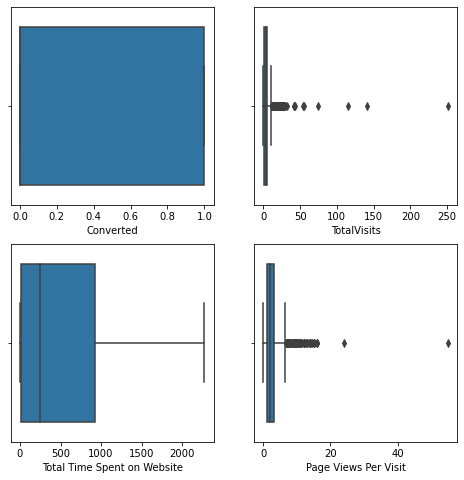

In [30]:
# Finding Outliers

plt.figure(figsize=(8, 8))
num_cols=leads.describe().columns.tolist()
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = num_cols[i], data = leads)
plt.show()

In [31]:
# Checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

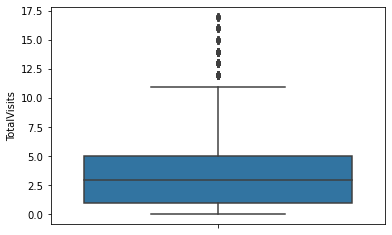

In [32]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values using Interquartile ranges

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [33]:
#checking spread of "Page Views Per Visit"

leads['Page Views Per Visit'].describe()

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

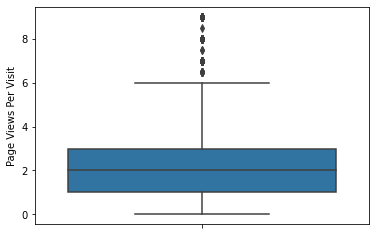

In [34]:
# Outlier Treatment: Remove top & bottom 1% using Interquartile ranges

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [35]:
# checking the shape of the dataset

leads.shape

(8924, 24)

In [36]:
# Checking the dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               8924 non-null   object 
 1   Lead Source                               8924 non-null   object 
 2   Do Not Email                              8924 non-null   object 
 3   Do Not Call                               8924 non-null   object 
 4   Converted                                 8924 non-null   int64  
 5   TotalVisits                               8924 non-null   float64
 6   Total Time Spent on Website               8924 non-null   int64  
 7   Page Views Per Visit                      8924 non-null   float64
 8   Last Activity                             8924 non-null   object 
 9   Specialization                            8924 non-null   object 
 10  What is your current occupation     

##### Visualizing the data

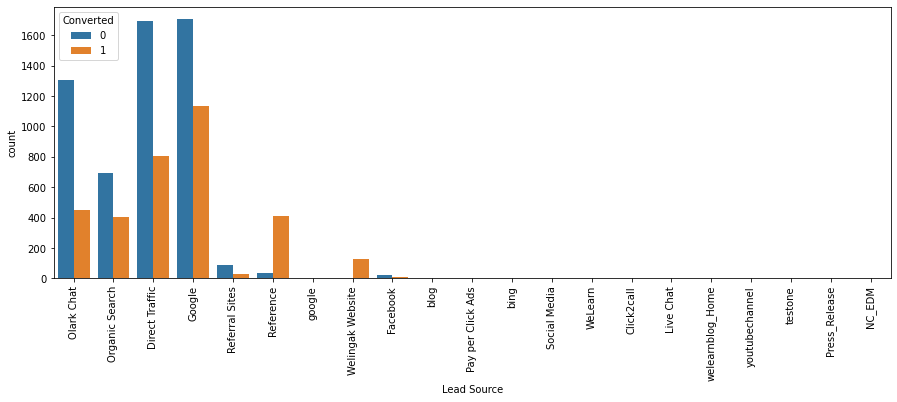

In [37]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

💎 Mostly converted resources are from Google platform Lead Source

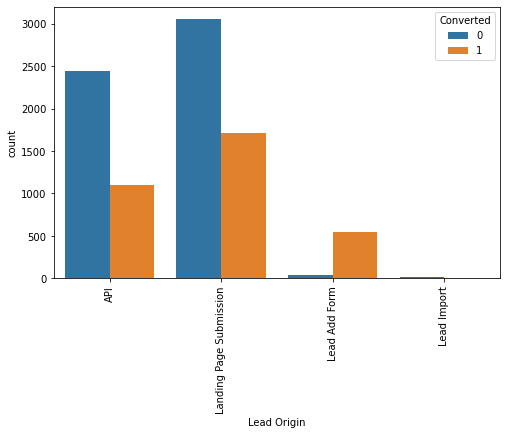

In [38]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

💎 People who landed on the Submission page have been converted into successful cases followed by API and then Add form

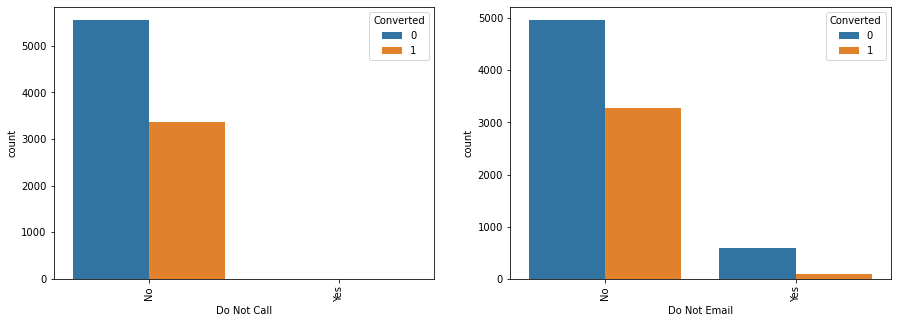

In [39]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

💎 Obviously who wanted call and email were converted and not converted as well.

##### Checking the columns to be removed with unique values

In [40]:
#check for columns with one unique value, count and freq is same

leads.describe(include = 'object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924,8924
unique,4,21,2,2,17,19,6,2,1,2,1,2,2,2,1,1,1,1,2,16
top,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,4768,2836,8235,8922,3385,3262,8027,8911,8924,8923,8924,8923,8921,8918,8924,8924,8924,8924,6126,3221


Checking & Dropping Category Columns that are Skewed

In [41]:
# Adding all column names to the drop column list where unique values

cols_to_drop = ['Magazine','X Education Forums','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque','Search','Do Not Call','Newspaper Article',
                'Newspaper','Digital Advertisement','Through Recommendations']

# dropping all above columns

leads.drop(cols_to_drop, axis = 1, inplace = True)

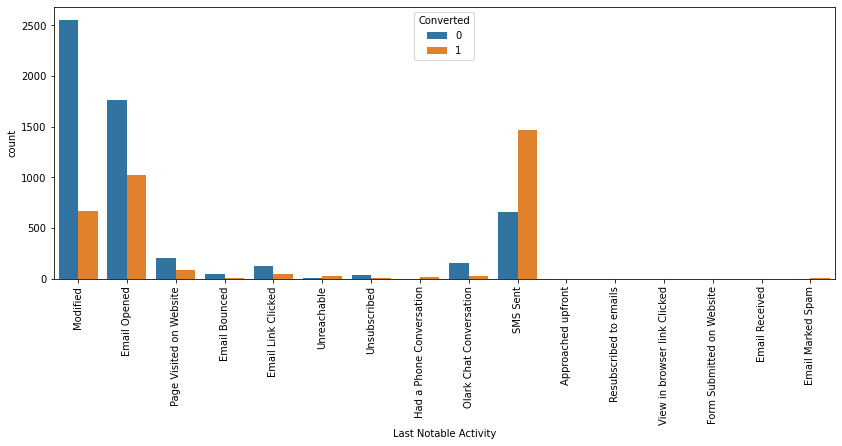

In [42]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

💎 People to whom SMS were sent were converted the most. SMS appears to be working good as per above.


💎 Email opened and modified were converted and lost much.

In [43]:
leads.shape

(8924, 12)

In [44]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.75212909009413

Approximately 38% targeted users were converted into a successful deal here as per the given data.

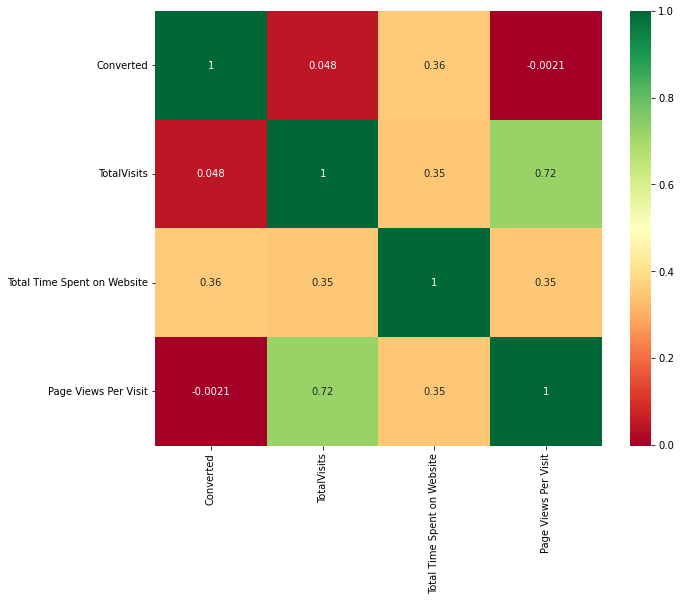

In [45]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="RdYlGn", annot=True)
plt.show()

Time spent on the website is highly correlated with the Converted Leads.

##### Data Preparation and Dummy Variable Creation

Fixing Invalid values & Standardising Data in columns

In [46]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [47]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

Dummy variable creation

In [48]:
# Creating Dummy Columns

dummies =  pd.get_dummies(leads.select_dtypes(include=['object']), drop_first=True)

In [49]:
leads_df =pd.concat([leads,dummies],axis=1)

In [50]:
# Removing original columns after dummy variable creation

leads_df.drop(cat_cols,1,inplace = True)

In [51]:
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


##### Test-Train Split

In [52]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
leads_train_df, leads_test_df = train_test_split(leads_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [53]:
#Checking the shape
print(leads_train_df.shape)
print(leads_test_df.shape)

(6246, 81)
(2678, 81)


##### Feature Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler
# Scaling columns
scaler = MinMaxScaler()
leads_train_df[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(leads_train_df[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
leads_train_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6676,1,0.176471,0.548856,0.333333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6138,1,0.235294,0.359155,0.444444,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8650,1,0.176471,0.496479,0.333333,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3423,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6552,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [55]:
#checking X-train dataset after scaling
leads_train_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.0,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.0,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.0,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.0,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000
mean,0.380243,0.184871,0.212004,0.250693,0.528498,0.063401,0.003522,0.275376,0.003682,0.321806,0.000160,0.0,0.199328,0.121358,0.000160,0.000160,0.048671,0.013929,0.0,0.000160,0.013449,0.000320,0.000160,0.000320,0.000160,0.000160,0.0,0.046910,0.034262,0.029779,0.000320,0.382325,0.000160,0.013609,0.002402,0.109190,0.066763,0.000160,0.298271,0.008806,0.006084,0.000320,0.000160,0.040026,0.006404,0.013289,0.105828,0.017931,0.011367,0.09221

In [56]:
# Dividing into X and Y train data sets
y_train = leads_train_df.pop('Converted')
X_train = leads_train_df

In [57]:
# print the shape of Xtrain and Ytrain

print(y_train.shape)
print(X_train.shape)

(6246,)
(6246, 80)


#### Model Building

In [58]:
# Importing RFE and Logistic regression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [59]:
# Running RFE with the output number of the variable equal to 20

logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [60]:
# checking the output of RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 54),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_NC_EDM', False, 59),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 48),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 41),
 ('Lead Source_blog', False, 19),
 ('Lead Source_google', False, 30),
 ('Lead Source_testone', False, 39),
 ('Lead Source_welearnblog_Home', False, 31),
 ('Le

In [61]:
# columns which are selected by RFE

col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [62]:
# columns which are not selected by RFE

X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Spec

##### Model Building - For Detailed Statistics

In [63]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

##### Model 1

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
lm = logm1.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6225
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2543.7
Date:                Mon, 20 Mar 2023   Deviance:                       5087.4
Time:                        10:14:10   Pearson chi2:                 6.45e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0626      0.175    -11.756      0.000      -2.406      -1.719
TotalVisits                                              1.9130      0.292      6.559      0.000       1.341       2.485
Total Time Spent on Website                              4.5092      0.169     26.743      0.000       4.179       4.840
Page Views Per Visit                                    -1.4267      0.267     -5.345      0.000      -1.950      -0.904
Lead Origin_Landing Page Submission                     -1.0497      0.130     -8.061      0.000      -1.305      -0.794
Lead Origin_Lead Add Form                                1.6487      0.873      1.890      0.059      -0.061       3.359
Lead Source_Olark Chat                                   1.0387      0.138      7.538      0.000       0.769       1.309
Lead Source_Reference                                    1.6808      0.895      1.878      0.060      -0.073       3.434
Lead Source_Welingak Website                             3.9473      1.133      3.483      0.000       1.726       6.169
Last Activity_Email Bounced                             -1.4134      0.383     -3.687      0.000      -2.165      -0.662
Last Activity_Email Opened                               0.8111      0.108      7.505      0.000       0.599       1.023
Last Activity_Had a Phone Conversation                   2.5330      0.946      2.678      0.007       0.679       4.387
Last Activity_Olark Chat Conversation                   -0.8459      0.190     -4.461      0.000      -1.218      -0.474
Last Activity_Resubscribed to emails                    24.6555   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   0.8534      0.167      5.099      0.000       0.525       1.181
Specialization_Others                                   -1.0656      0.127     -8.386      0.000      -1.315      -0.817
What is your current occupation_Housewife               23.0769   1.65e+04      0.001      0.999   -3.23e+04    3.24e+04
What is your current occupation_Working Professional     2.5926      0.191     13.548      0.000       2.217       2.968
Last Notable Activity_Had a Phone Conversation          22.0505   1.65e+04      0.001      0.999   -3.24e+04    3.24e+04
Last Notable Activity_SMS Sent                           1.4576      0.154      9.485      0.000       1.156       1.759
Last Notable Activity_Unreachable                        2.5347      0.586      4.325      0.000       1.386       3.683
========================================================================================================================
"""

In [65]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,46.84
7,Lead Source_Reference,37.38
0,const,23.28
8,Lead Source_Welingak Website,11.47
14,Last Activity_SMS Sent,4.83
19,Last Notable Activity_SMS Sent,3.86
4,Lead Origin_Landing Page Submission,3.42
15,Specialization_Others,3.02
3,Page Views Per Visit,2.68
6,Lead Source_Olark Chat,2.38


Due to highest value of VIF we have removed the column 'Lead Origin_Lead Add Form'

In [67]:
# Due to high VIF dropping column
X_train_rfe.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

##### Model 2

In [68]:
# Creating the model again

X_train_rfe = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
lm2 = logm2.fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6226
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.7
Date:                Mon, 20 Mar 2023   Deviance:                       5091.5
Time:                        10:14:11   Pearson chi2:                 6.45e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4014
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0221      0.174    -11.614      0.000      -2.363      -1.681
TotalVisits                                              1.8975      0.291      6.518      0.000       1.327       2.468
Total Time Spent on Website                              4.5017      0.168     26.739      0.000       4.172       4.832
Page Views Per Visit                                    -1.4446      0.267     -5.416      0.000      -1.967      -0.922
Lead Origin_Landing Page Submission                     -1.0759      0.130     -8.297      0.000      -1.330      -0.822
Lead Source_Olark Chat                                   1.0235      0.137      7.452      0.000       0.754       1.293
Lead Source_Reference                                    3.3009      0.256     12.908      0.000       2.800       3.802
Lead Source_Welingak Website                             5.5794      0.734      7.599      0.000       4.140       7.018
Last Activity_Email Bounced                             -1.4178      0.383     -3.698      0.000      -2.169      -0.666
Last Activity_Email Opened                               0.8112      0.108      7.519      0.000       0.600       1.023
Last Activity_Had a Phone Conversation                   2.5272      0.945      2.674      0.007       0.675       4.379
Last Activity_Olark Chat Conversation                   -0.8515      0.190     -4.493      0.000      -1.223      -0.480
Last Activity_Resubscribed to emails                    24.6532   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   0.8496      0.167      5.080      0.000       0.522       1.177
Specialization_Others                                   -1.0885      0.127     -8.595      0.000      -1.337      -0.840
What is your current occupation_Housewife               23.0690   1.65e+04      0.001      0.999   -3.23e+04    3.24e+04
What is your current occupation_Working Professional     2.5869      0.191     13.517      0.000       2.212       2.962
Last Notable Activity_Had a Phone Conversation          22.0551   1.65e+04      0.001      0.999   -3.23e+04    3.24e+04
Last Notable Activity_SMS Sent                           1.4600      0.154      9.502      0.000       1.159       1.761
Last Notable Activity_Unreachable                        2.5295      0.586      4.317      0.000       1.381       3.678
========================================================================================================================
"""

In [69]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.12
13,Last Activity_SMS Sent,4.83
18,Last Notable Activity_SMS Sent,3.86
4,Lead Origin_Landing Page Submission,3.40
14,Specialization_Others,3.00
3,Page Views Per Visit,2.67
5,Lead Source_Olark Chat,2.38
1,TotalVisits,2.22
9,Last Activity_Email Opened,2.04
11,Last Activity_Olark Chat Conversation,1.75


Due to high p-value removing the column 'What is your current occupation_Housewife'

In [70]:
# Checking the high p-value of What is your current occupation_Housewife hence removing

X_train_rfe.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

##### Model 3

In [71]:
# Creating model 3
X_train_rfe = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
lm3 = logm3.fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.1
Date:                Mon, 20 Mar 2023   Deviance:                       5102.1
Time:                        10:14:12   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4004
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0169      0.174    -11.593      0.000      -2.358      -1.676
TotalVisits                                              1.8863      0.291      6.484      0.000       1.316       2.457
Total Time Spent on Website                              4.4998      0.168     26.759      0.000       4.170       4.829
Page Views Per Visit                                    -1.4539      0.267     -5.454      0.000      -1.976      -0.931
Lead Origin_Landing Page Submission                     -1.0719      0.130     -8.275      0.000      -1.326      -0.818
Lead Source_Olark Chat                                   1.0173      0.137      7.414      0.000       0.748       1.286
Lead Source_Reference                                    3.2984      0.256     12.908      0.000       2.798       3.799
Lead Source_Welingak Website                             5.5744      0.734      7.592      0.000       4.135       7.013
Last Activity_Email Bounced                             -1.4191      0.383     -3.703      0.000      -2.170      -0.668
Last Activity_Email Opened                               0.8197      0.108      7.603      0.000       0.608       1.031
Last Activity_Had a Phone Conversation                   2.5265      0.945      2.675      0.007       0.675       4.378
Last Activity_Olark Chat Conversation                   -0.8478      0.190     -4.474      0.000      -1.219      -0.476
Last Activity_Resubscribed to emails                    24.6578   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   0.8494      0.167      5.080      0.000       0.522       1.177
Specialization_Others                                   -1.0921      0.127     -8.631      0.000      -1.340      -0.844
What is your current occupation_Working Professional     2.5809      0.191     13.488      0.000       2.206       2.956
Last Notable Activity_Had a Phone Conversation          22.0543   1.65e+04      0.001      0.999   -3.23e+04    3.24e+04
Last Notable Activity_SMS Sent                           1.4603      0.154      9.505      0.000       1.159       1.761
Last Notable Activity_Unreachable                        2.5289      0.586      4.317      0.000       1.381       3.677
========================================================================================================================
"""

Due to high p-value of 'Last Activity_Resubscribed to emails' we have removed the column

In [72]:
# Removing Last Activity_Resubscribed to emails as high value of p-value

X_train_rfe.drop('Last Activity_Resubscribed to emails', axis = 1, inplace = True)

##### Model 4

In [73]:
# Creating model 4
X_train_rfe = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
lm4 = logm4.fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6228
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2553.3
Date:                Mon, 20 Mar 2023   Deviance:                       5106.5
Time:                        10:14:12   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4000
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0113      0.174    -11.571      0.000      -2.352      -1.671
TotalVisits                                              1.8835      0.291      6.477      0.000       1.314       2.454
Total Time Spent on Website                              4.4982      0.168     26.757      0.000       4.169       4.828
Page Views Per Visit                                    -1.4514      0.266     -5.446      0.000      -1.974      -0.929
Lead Origin_Landing Page Submission                     -1.0700      0.129     -8.263      0.000      -1.324      -0.816
Lead Source_Olark Chat                                   1.0234      0.137      7.462      0.000       0.755       1.292
Lead Source_Reference                                    3.2989      0.256     12.911      0.000       2.798       3.800
Lead Source_Welingak Website                             5.5733      0.734      7.591      0.000       4.134       7.012
Last Activity_Email Bounced                             -1.4274      0.383     -3.725      0.000      -2.178      -0.676
Last Activity_Email Opened                               0.8112      0.108      7.538      0.000       0.600       1.022
Last Activity_Had a Phone Conversation                   2.5188      0.945      2.667      0.008       0.668       4.370
Last Activity_Olark Chat Conversation                   -0.8590      0.189     -4.537      0.000      -1.230      -0.488
Last Activity_SMS Sent                                   0.8413      0.167      5.036      0.000       0.514       1.169
Specialization_Others                                   -1.0893      0.126     -8.612      0.000      -1.337      -0.841
What is your current occupation_Working Professional     2.5801      0.191     13.488      0.000       2.205       2.955
Last Notable Activity_Had a Phone Conversation          22.0541   1.65e+04      0.001      0.999   -3.23e+04    3.24e+04
Last Notable Activity_SMS Sent                           1.4597      0.154      9.503      0.000       1.159       1.761
Last Notable Activity_Unreachable                        2.5215      0.586      4.305      0.000       1.373       3.670
========================================================================================================================
"""

In [74]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.11
12,Last Activity_SMS Sent,4.83
16,Last Notable Activity_SMS Sent,3.86
4,Lead Origin_Landing Page Submission,3.40
13,Specialization_Others,3.00
3,Page Views Per Visit,2.67
5,Lead Source_Olark Chat,2.38
1,TotalVisits,2.22
9,Last Activity_Email Opened,2.04
11,Last Activity_Olark Chat Conversation,1.75


💎All p values are less than 0.05
💎VIF's are less than 5

### ✌✌ Conclusion

So we final our Model 4 for Evaluation

##### Model Evaluation

This will be done on the below metrics

✨ Confusion Matrix

✨ Accuracy

✨ Sensitivity and Specificity

✨ Threshold determination using ROC & Finding Optimal cutoff point

✨ Precision and Recall


In [75]:
# features and their coefficicent from final model
parameters=lm4.params.sort_values(ascending=False)
parameters

Last Notable Activity_Had a Phone Conversation          22.054079
Lead Source_Welingak Website                             5.573319
Total Time Spent on Website                              4.498202
Lead Source_Reference                                    3.298861
What is your current occupation_Working Professional     2.580061
Last Notable Activity_Unreachable                        2.521535
Last Activity_Had a Phone Conversation                   2.518824
TotalVisits                                              1.883535
Last Notable Activity_SMS Sent                           1.459740
Lead Source_Olark Chat                                   1.023374
Last Activity_SMS Sent                                   0.841329
Last Activity_Email Opened                               0.811172
Last Activity_Olark Chat Conversation                   -0.859003
Lead Origin_Landing Page Submission                     -1.069957
Specialization_Others                                   -1.089317
Last Activ

1. 'Last Notable Activity_Had a Phone Conversation' is one of the most inportant feature to be kept in mind
2. If the Lead Source_Welingak Website is true then this lead will be converted
3. If Total Time Spent on Website is more then this information is 100% valuable

In [76]:
# Getting the predicted values on the train set

y_train_pred = lm4.predict(X_train_rfe)
y_train_pred[:10]

6676    0.511832
6138    0.653272
8650    0.916200
3423    0.050389
6552    0.219923
1696    0.162073
2110    0.928551
6830    0.020890
2581    0.185493
5927    0.133757
dtype: float64

In [77]:
# for array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.51183189, 0.65327239, 0.91619955, 0.05038866, 0.2199235 ,
       0.16207286, 0.92855144, 0.02089018, 0.18549281, 0.1337573 ])

In [78]:
# Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.511832,6676
1,1,0.653272,6138
2,1,0.916200,8650
3,0,0.050389,3423
4,0,0.219923,6552


💎 Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [79]:
# Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,1,0.511832,6676,1
1,1,0.653272,6138,1
2,1,0.916200,8650,1
3,0,0.050389,3423,0
4,0,0.219923,6552,0


##### Confusion Matrix

In [80]:
# Import libraries

from sklearn import metrics

In [81]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3431  440]
 [ 681 1694]]


##### Accuracy

In [82]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8205251360870958


##### Metrics beyond simply accuracy

In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7132631578947368

In [85]:
# Let us calculate specificity
TN / float(TN+FP)

0.8863342805476621

In [86]:
# Calculate false postive rate - predicting Converted when Lead does not have Converted
print(FP/ float(TN+FP))

0.1136657194523379


In [87]:
# positive predictive value 
print (TP / float(TP+FP))

0.7938144329896907


In [88]:
# Negative predictive value
print (TN / float(TN+ FN))

0.834387159533074


##### Plotting the ROC Curve

🔶 An ROC curve demonstrates several things:

💨 It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

💨 The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

💨 The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [89]:
# User defined function to draw ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

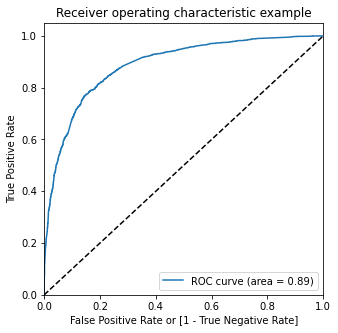

In [91]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

💎 Area under ROC curve is 0.89 out of 1 which indicates a good predictive model.

##### Finding Optimal Cutoff Point / Probability

In [92]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.511832,6676,1,1,1,1,1,1,1,0,0,0,0
1,1,0.653272,6138,1,1,1,1,1,1,1,1,0,0,0
2,1,0.916200,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.050389,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.219923,6552,0,1,1,1,0,0,0,0,0,0,0


In [93]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.380243     1.000000     0.000000
0.1          0.1  0.617035     0.970526     0.400155
0.2          0.2  0.743356     0.920842     0.634461
0.3          0.3  0.799712     0.842526     0.773444
0.4          0.4  0.818124     0.784842     0.838543
0.5          0.5  0.820525     0.713263     0.886334
0.6          0.6  0.802914     0.598316     0.928442
0.7          0.7  0.787544     0.520842     0.951175
0.8          0.8  0.757925     0.414316     0.968742
0.9          0.9  0.715498     0.272421     0.987342


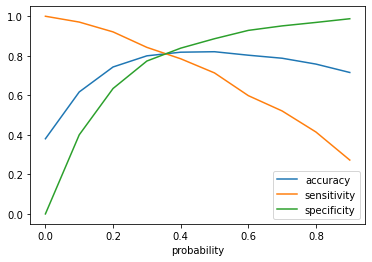

In [94]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Note: From the curve above, 0.35 is the  point to take it where all the curves meet, so 0.35 seems to be our Optimal cutoff point for probability threshold .

Now, lets do mapping again using optimal cutoff point

In [95]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.511832,6676,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.653272,6138,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.916200,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.050389,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.219923,6552,0,1,1,1,0,0,0,0,0,0,0,0


✔ Calculating all metrics using confusion matrix for Train

##### Final Accuracy

In [96]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8099583733589497

##### Final Confusion Matrix

In [97]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3128,  743],
       [ 444, 1931]], dtype=int64)

In [98]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

##### Final Sensitivity

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8130526315789474

##### Final Specificity

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.8080599328338931

In [101]:
# Calculate false postive rate - predicting Converted when Lead does not have Converted
print(FP/ float(TN+FP))

0.19194006716610695


In [102]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7221391174270756


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8756998880179171


##### Precision and Recall

Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [104]:
from sklearn.metrics import precision_score, recall_score

In [105]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7221391174270756

In [106]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8130526315789474

##### Precision and Recall Trade-off

In [107]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [108]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

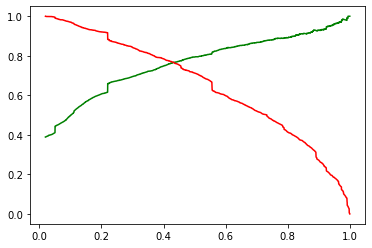

In [109]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

NOTE: The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

##### Making Predictions - Test Dataset

In [110]:
# scaling features

leads_test_df[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(leads_test_df[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
leads_test_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7625,0,0.117647,0.713468,0.222222,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5207,1,0.235294,0.390405,0.444444,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2390,1,0.000000,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4362,0,0.117647,0.102113,0.222222,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1023,0,0.882353,0.139525,0.555556,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [111]:
# Dividing into X_test and y_test
y_test = leads_test_df.pop('Converted')
X_test = leads_test_df

In [112]:
# Drop the const variable

X_train_rfe.drop(['const'], axis=1, inplace=True)

In [113]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [114]:
X_test_new.shape

(2678, 18)

##### Making Prediction - Final Model

In [115]:
# Making predictions
y_test_pred = lm4.predict(X_test_new)
y_test_pred[:10]

7625    0.698100
5207    0.328302
2390    0.310113
4362    0.396077
1023    0.312837
8226    0.768252
3079    0.057753
530     0.139956
7873    0.050389
5146    0.772840
dtype: float64

In [116]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7625,0.698100
5207,0.328302
2390,0.310113
4362,0.396077
1023,0.312837


In [117]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [118]:
# Removing index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [119]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,0,0.698100
1,1,0.328302
2,1,0.310113
3,0,0.396077
4,0,0.312837


In [120]:
# Renaming the column

y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
# Putting leadID to index
y_test_df['leadID'] = y_test_df.index

In [121]:
# Rearranging the columns

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.698100
1,1,0.328302
2,1,0.310113
3,0,0.396077
4,0,0.312837


In [122]:
# Making prediction using cut off 0.35

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.698100,1
1,1,0.328302,0
2,1,0.310113,0
3,0,0.396077,1
4,0,0.312837,0


In [123]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8002240477968633

In [124]:
# Creating confusion matrix

confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1346,  338],
       [ 197,  797]], dtype=int64)

In [125]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8018108651911469

In [127]:
# Let us calculate specificity
TN / float(TN+FP)

0.7992874109263658

In [128]:
# Precision
TP / (TP + FP)

0.7022026431718061

In [129]:
#Recall 
TP / (TP + FN)

0.8018108651911469

With the current cut-off as 0.35 we have Precision around 72% and Recall around 81%.

## 🔶Conclusion

➡ Train Data Set

        💨 Accuracy : 81%
        💨 Sensitivity: 81.31%
        💨 Specificity : 80.81%
        

➡ Test Data Set

        💨 Accuracy : 80.02%
        💨 Sensitivity: 80.18%
        💨 Specificity : 79.93%

##### The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

        • The model has achieved a sensitivity of 81.31% in train set and 80.18% in test set which means how many values our model is able to correctly identify.
        • The model has achieved Accuracy of 81% which means we were able to achieve the goal of 80% accuracy as per the expectation of CEO of X Education.
        • The recall of 80.18% also resembles this model is doing very good.
        